<a href="https://colab.research.google.com/github/Nada-Tahani/AI/blob/main/4G9_ASSIGN6new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
data=pd.read_excel('/content/drive/MyDrive/big')
data

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [23]:
xmax=np.max(data['X'])
xmin=np.min(data['X'])
data['X']= (data['X'] - xmin) / (xmax - xmin)

In [24]:

ymax=np.max(data['Y'])
ymin=np.min(data['Y'])
data['Y'] = (data['Y'] - ymin) / (ymax - ymin)

In [25]:
data.head()

,X,Y
0,0.428571,0.537445
1,0.190476,0.612335
2,0.714286,0.616740
3,0.380952,0.674009
4,0.333333,0.599119


In [26]:
from sklearn.model_selection import train_test_split
X = data['X']
Y = data['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.1, random_state=101)

In [27]:
m1 = np.random.uniform(-10, 10)
m2 = np.random.uniform(-10, 10)
c = np.random.uniform(-10, 10)
eeta = 0.1
epochs = 5000

for _ in range(epochs):
    for i in range(xtrain.shape[0]):
        x,y = xtrain.iloc[i], ytrain.iloc[i]
        ypred = (x ** 2) * m1 + x * m2 + c
        gradm1 = -1 * (x ** 2) * (y - ypred)
        gradm2 = -1 * x * (y - ypred)
        gradc = -1 * (y - ypred)
        m1 = m1 - eeta * gradm1
        m2 = m2 - eeta * gradm2
        c = c - eeta * gradc
print('Model Parameters :')
print('m1 =', m1)
print('m2 =', m2)
print('c =', c)

Model Parameters :
m1 = -0.2821548474491693
m2 = -0.11619957749244239
c = 0.5919254032192853


In [28]:
ytrainPred = []
for x in xtrain:
    ypred=m1*x**2+m2*x+c
    ytrainPred.append(ypred)
ytestPred = []
for x in xtest:
    pred=m1*x**2+m2*x+c
    ytestPred.append(pred)

In [29]:
xtrain = xtrain * (xmax - xmin) + xmin
ytrain = ytrain * (ymax - ymin) + ymin
xtest = xtest * (xmax - xmin) + xmin
ytest = ytest * (ymax - ymin) + ymin
ytrainPred = np.multiply(ytrainPred, (ymax - ymin)) + ymin
ytestPred = np.multiply(ytestPred, (ymax - ymin)) + ymin

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE_Train = mean_absolute_error(ytrainPred, ytrain) 
MSE_Train = mean_squared_error(ytrainPred, ytrain) 
RMSE_Train = mean_squared_error(ytrainPred, ytrain) ** 0.5 
MAE_Test = mean_absolute_error(ytestPred, ytest) #Testing MAE
MSE_Test = mean_squared_error(ytestPred, ytest) #Testing MSE
RMSE_Test = mean_squared_error(ytestPred, ytest) ** 0.5 #Testing RMSE
print('Training Error :')
print('Mean Absolute Error :', MAE_Train)
print('Mean Squared Error :', MSE_Train)
print('Root Mean Squared Error :', RMSE_Train)
print('\nTesting Error :')
print('Mean Absolute Error :', MAE_Test)
print('Mean Squared Error :', MSE_Test)
print('Root Mean Squared Error :', RMSE_Test)

Training Error :
Mean Absolute Error : 44.70603911044562
Mean Squared Error : 2651.7849919033715
Root Mean Squared Error : 51.49548516038441

Testing Error :
Mean Absolute Error : 41.34586779156042
Mean Squared Error : 2765.142678584771
Root Mean Squared Error : 52.58462397492989


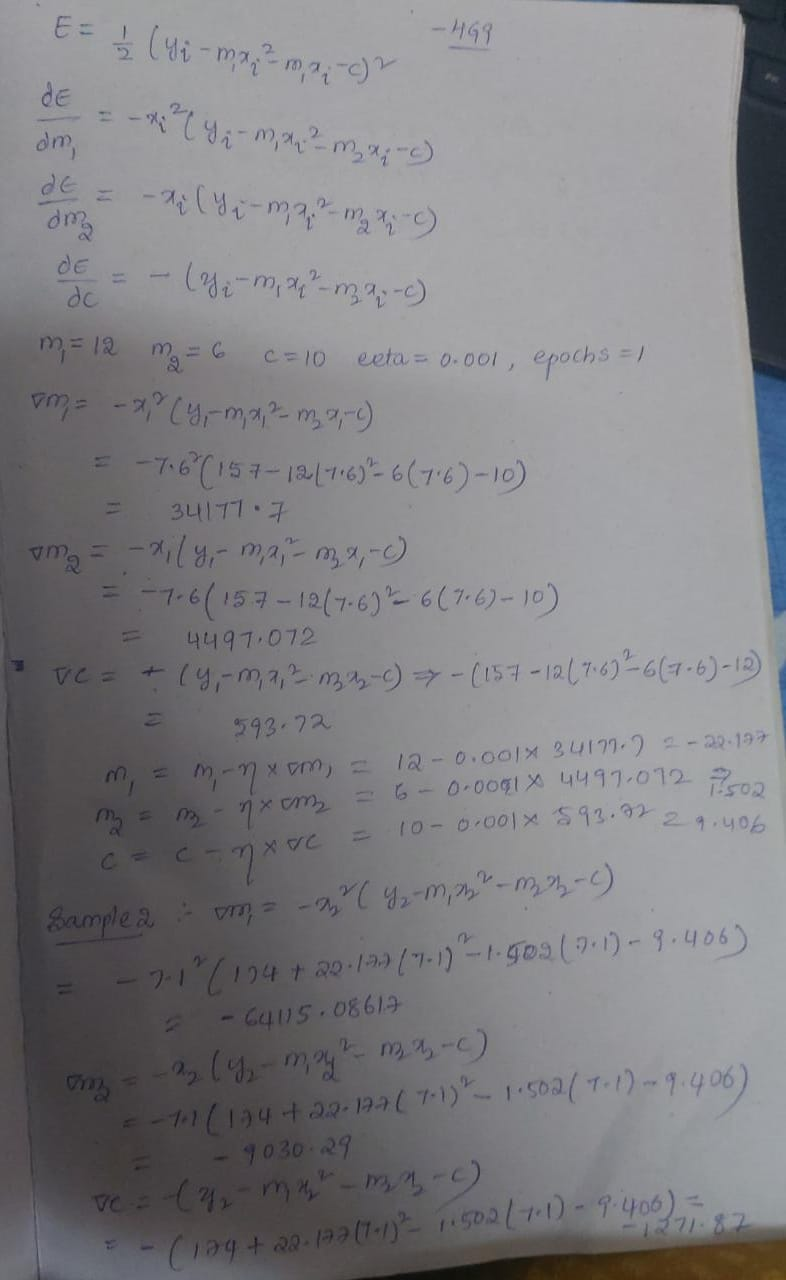

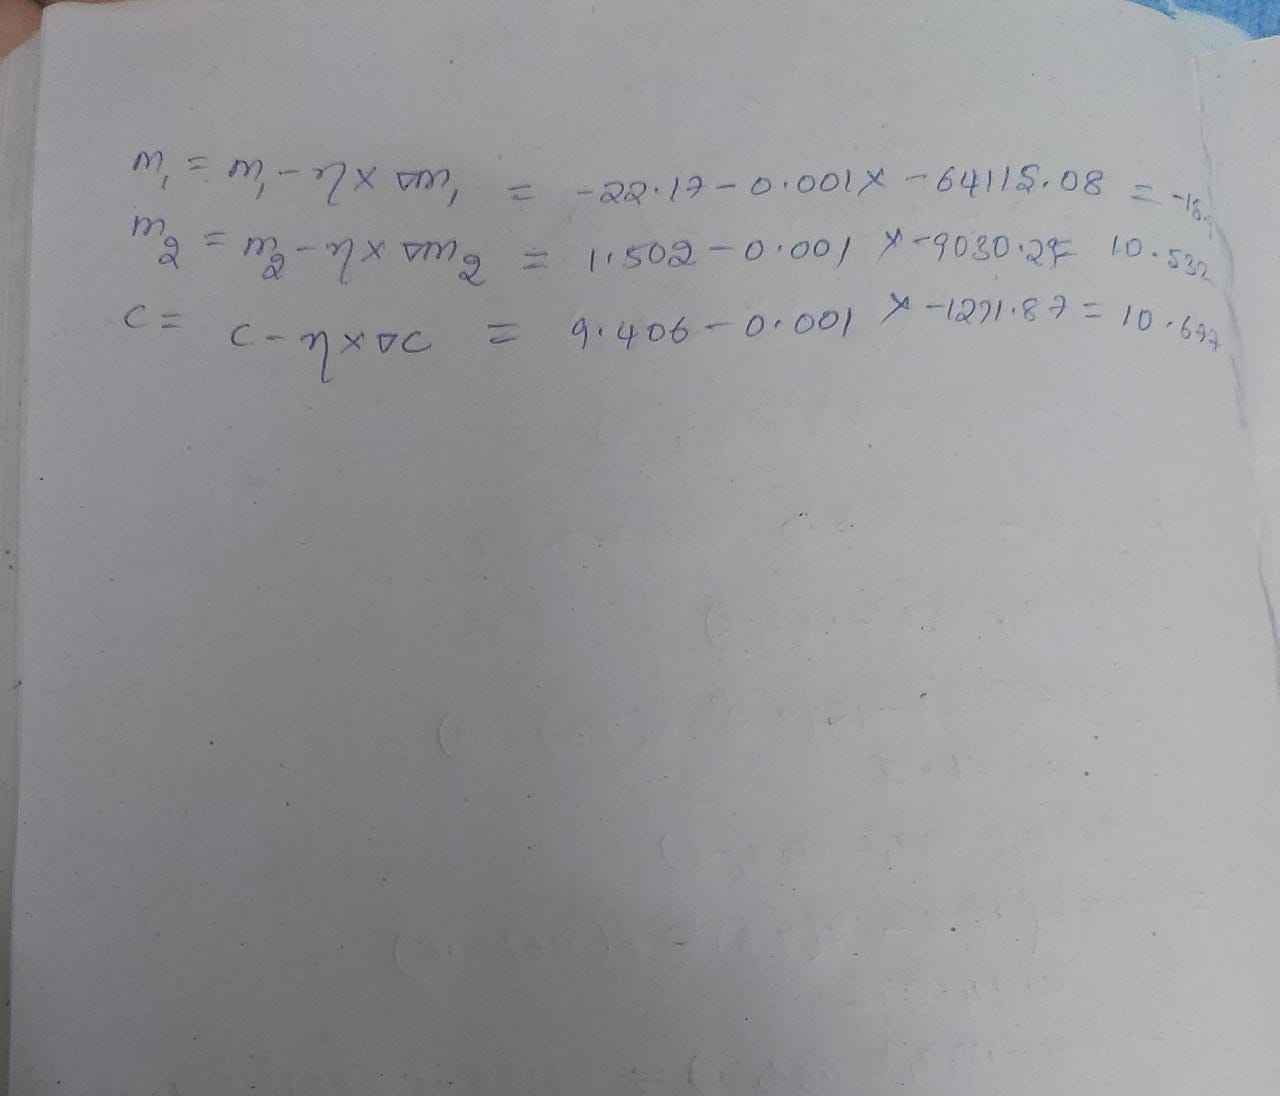